In [ ]:
# use this to compile Cython extensions
! python3 setup.py build_ext --inplace

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# module for conversion of coordinates and vector fields 
# between cartesian, cylindrical and spherical coordinates
import transform as tr

# module for magnetic field calculations
import jfield

## Internal field

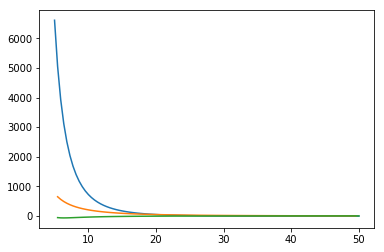

In [2]:
# Native coordinates for internal field calculation: System III spherical.

N = 100
# Example sample points in System III coordinates: r in RJ, theta, phi in radians
r = np.linspace(5, 50, N)
theta = np.linspace(0, np.pi, N)
phi = np.linspace(0, np.pi, N)

# Internal magnetic field in sample points in nT, System III spherical
B_internal_SIII_sph = jfield.internal_field(r, theta, phi)

# Plot Br
plt.plot(r, B_internal_SIII_sph[0])
# Plot Btheta
plt.plot(r, B_internal_SIII_sph[1])
# Plot Bphi
plt.plot(r, B_internal_SIII_sph[2])

## Current disc field

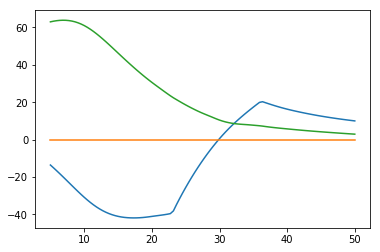

In [3]:
# Native coordinates for current disk field calculation: magnetic cylindrical.

N = 100
# Example sample points in magnetic coordinates: rho, z in RJ, phi in radians
rho = np.linspace(5, 50, N)
phi = np.linspace(0, np.pi, N)
z = np.linspace(-10, 10, N)

# PCD need coordinate x_jso of the sample point - position on the Jupiter-Sun axis
# to calculate curvature of the disc

# Longtitude of the Sun in magnetic coordinates in rad
sun_phi = 0

# Angle between rotation axis of Jupiter 
# and dipole of the internal field
# according to model of the internal field in use
psi0 = jfield.params.dipole_tilt

x_jso = rho * np.tan(psi0) * np.cos(phi - sun_phi)

# Internal magnetic field in sample points in nT, magnetic cylindrical
B_pcd_M_cyl = jfield.PCD_field(rho, phi, z, x_jso)

# Plot Brho
plt.plot(r, B_pcd_M_cyl[0])
# Plot Bphi
plt.plot(r, B_pcd_M_cyl[1])
# Plot Bz
plt.plot(r, B_pcd_M_cyl[2])

In [4]:
jfield.params.PCD

PCDParams(I0=23.6, D=2.5, Rin=7.1, Rout=95, R1=27.3, R2=50)

## get/set parameters

In [9]:
# jfield.params holds parameters of the models

# set radius of the Jupiter in km
jfield.params.RJ = 71492

# get parameters of PCD
PCD_params = jfield.params.PCD
print(PCD_params.Rin)

# set parameters of PCD
jfield.params.set_pcd_params(I0 = 23.6)
jfield.params.set_pcd_params(D = 2.5, R1 = 27.3)

7.1


## Coordinates transformations

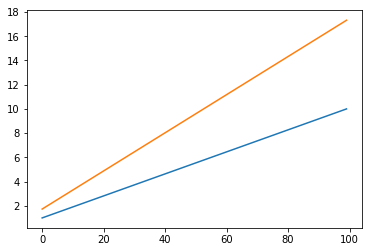

In [10]:
N = 100
# cartesian coordinates
coords_cart = np.array([np.linspace(1,10,N), np.linspace(1,10,N), np.linspace(1,10,N)])

# calculate spherical coordinates
coords_sph = tr.coords_cart2sph(coords_cart)

# plot x
plt.plot(coords_cart[0])

# plot r
plt.plot(coords_sph[0])

## Vector fields transformations

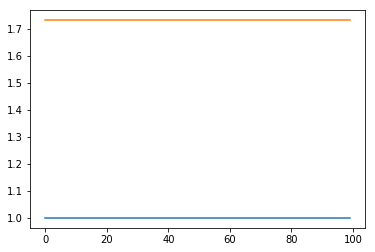

In [11]:
N = 100
# cartesian coordinates
coords_cart = np.array([np.linspace(1,10,N), np.linspace(1,10,N), np.linspace(1,10,N)])

# vector field in cartesian coordinates
field_cart = np.array([np.ones(N), np.ones(N), np.ones(N)])

# calculate vector field in spherical coordinates
field_sph = tr.vectors_cart2sph(field_cart, coords_cart)

# plot x component of the field
plt.plot(field_cart[0])

# plot r component of the field
plt.plot(field_sph[0])

## System III to Magnetic system and vise-versa  transformation

In [12]:
N = 100
# IMPORTANT : WORKS ONLY FOR CARTESIAN COORDIANTES

# cartesian coords in System III
coords_SIII_cart = np.array([np.linspace(1,10,N), np.linspace(1,10,N), np.linspace(1,10,N)])

# field in cartesian coords in System III
field_SIII_cart = np.array([np.ones(N), np.ones(N), np.ones(N)])

# calculate cartesian coords in Magnetic System
coords_M_cart = jfield.SIII2M(coords_SIII_cart)

# calculate field cartesian coords in Magnetic System
field_M_cart = jfield.SIII2M(field_SIII_cart)

# backwards
coords_SIII_cart = jfield.M2SIII(coords_M_cart)

## Juno Perijove-01 example

In [21]:
# read example data
data = np.loadtxt('Example Data/PERI-01-pc.dat')
x_jso = np.loadtxt('Example Data/PERI-01-ss.dat')[:,2] / jfield.params.RJ

# day of year
doy = data[:,1]

In [22]:
# cartesian System III coordinates
coords_SIII_cart = np.transpose(data[:,2:5] / jfield.params.RJ)

# spherical System III coordinates
coords_SIII_sph = tr.coords_cart2sph(coords_SIII_cart)

# cartesian Magnetic coordinates
coords_M_cart = jfield.SIII2M(coords_SIII_cart)

# cylindrical Magnetic coordinates
coords_M_cyl = tr.coords_cart2cyl(coords_M_cart)

# observed field in System III cartesian
B_obs_SIII_cart = np.transpose(data[:,5:8])

# observed field in Magnetic cartesian
B_obs_M_cart = jfield.SIII2M(B_obs_SIII_cart)

# observed field in Magnetic cylindrical
B_obs_M_cyl = tr.vectors_cart2cyl(B_obs_M_cart, coords_M_cart)

In [26]:
# internal field along the trajectory in System III spherical
B_int_SIII_sph = jfield.internal_field(coords_SIII_sph[0], coords_SIII_sph[1], coords_SIII_sph[2])

# internal field along the trajectory in System III cartesian
B_int_SIII_cart = tr.vectors_sph2cart(B_int_SIII_sph, coords_SIII_sph)

# internal field along the trajectory in Magnetic cartesian
B_int_M_cart = jfield.SIII2M(B_int_SIII_cart)

# internal field along the trajectory in Magnetic cylindrical
B_int_M_cyl = tr.vectors_cart2cyl(B_int_M_cart, coords_M_cart)

In [24]:
rho, phi, z = coords_M_cyl

# current disc field in Magnetic cylindrical 
B_cd_M_cyl = jfield.PCD_field(rho, phi, z, x_jso)

<IPython.core.display.Javascript object>


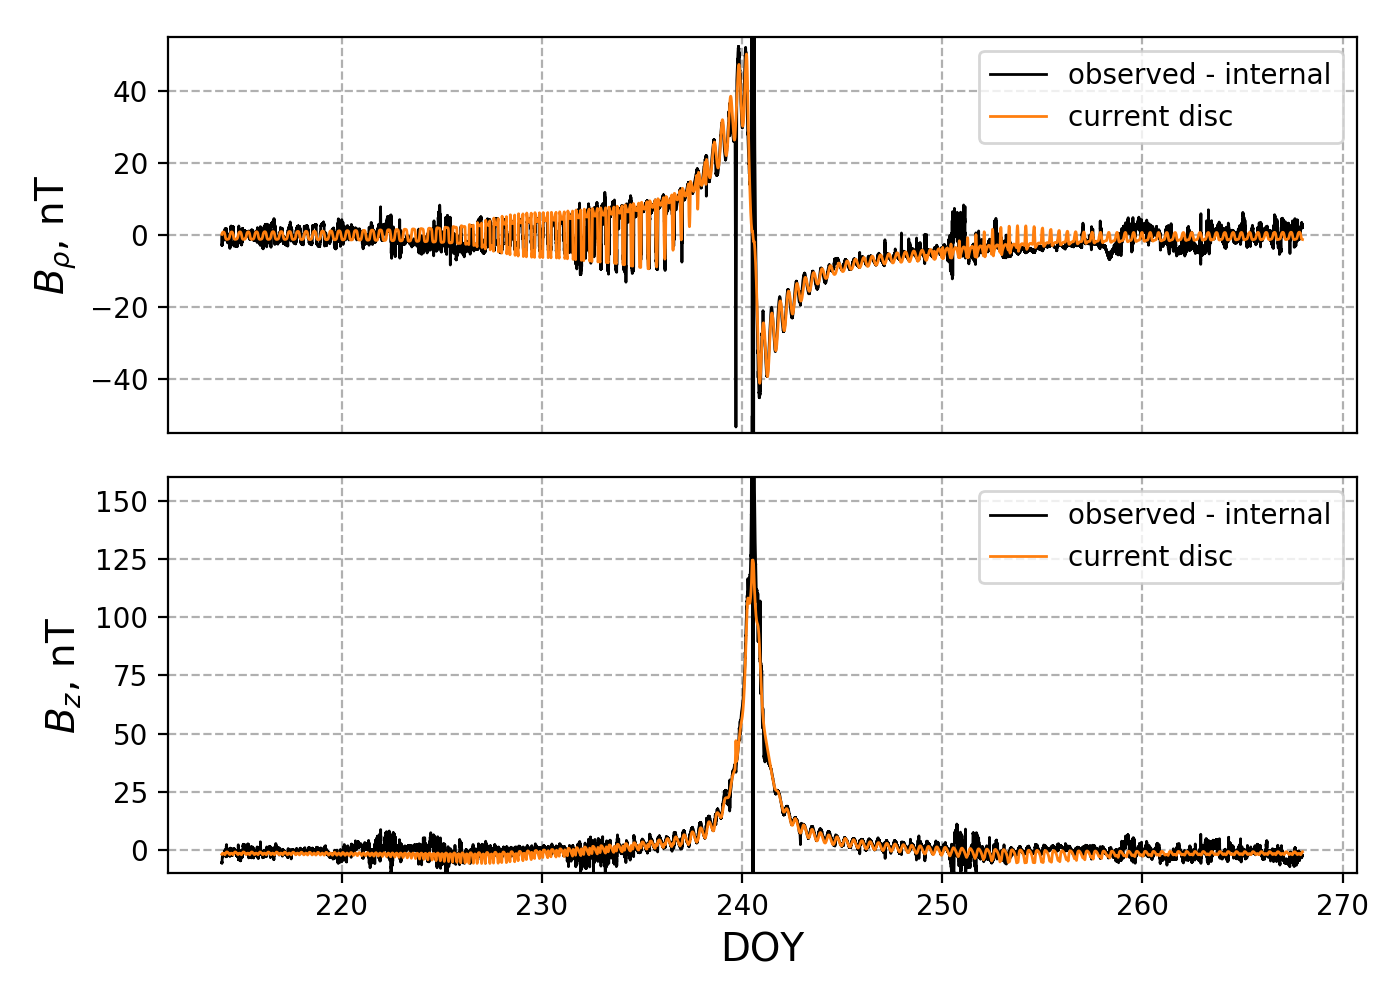

In [39]:
%matplotlib notebook

c_ob = 'black'
c_md = '#ff7f0e'

figure, (ax1, ax2) = plt.subplots(2,1,figsize=(7,5))
ax1.plot(doy, B_obs_M_cyl[0] - B_int_M_cyl[0], color = c_ob, linewidth = 1, label = 'observed - internal')
ax1.plot(doy, B_cd_M_cyl[0], color = c_md, linewidth = 1, label = 'current disc')

ax2.plot(doy, B_obs_M_cyl[2] - B_int_M_cyl[2], color = c_ob, linewidth = 1, label = 'observed - internal')
ax2.plot(doy, B_md_M_cyl[2], color = c_md, linewidth = 1, label = 'current disc')

ax1.set_ylim(-55, 55)
ax2.set_ylim(-10, 160)
ax1.grid(linestyle = '--')
ax2.grid(linestyle = '--')

ax1.set_ylabel(r'$B_{\rho}$, nT', fontsize = 14)
ax2.set_ylabel(r'$B_{z}$, nT', fontsize = 14)
ax2.set_xlabel('DOY', fontsize = 14)
ax1.set_xticklabels([])
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
ax1.legend()
ax2.legend()

figure.tight_layout()